In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
from LSTM_for_Stock import unit
import seaborn as sns

Using TensorFlow backend.


### 训练集

In [2]:
dataloader = DataLoader('601398', '399300')
model = Model()
comp = {"optimizer": "adam",
        "loss": "mse",
        "metrics": [
            "mae",
            "acc"
        ]}
norm = True
days = 5
window = 60
layers = [{'units': 100, 'type': 'lstm','return_sequences':True},
          {'rate': 0.15, 'type': 'dropout'},
          {'units': 200, 'type': 'lstm','return_sequences':False},
    {'units': days, 'type': 'dense', 'activation': 'linear'}]
train = {'epochs': 10, 'verbose': 2, 'validation_split': 0.15}

model.build_model(layers, comp)
X, Y = dataloader.get_train_data(window, days, norm)
history = model.train(X, Y, train)

QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2206 samples, validate on 390 samples
Epoch 1/10
 - 12s - loss: 5.7009e-04 - mean_absolute_error: 0.0135 - acc: 0.1990 - val_loss: 1.6824e-05 - val_mean_absolute_error: 0.0031 - val_acc: 0.1872
Epoch 2/10
 - 10s - loss: 4.9144e-05 - mean_absolute_error: 0.0052 - acc: 0.2121 - val_loss: 2.9772e-05 - val_mean_absolute_error: 0.0045 - val_acc: 0.1667
Epoch 3/10
 - 10s - loss: 4.5379e-05 - mean_absolute_error: 0.0050 - acc: 0.2072 - val_loss: 2.0506e-05 - val_mean_absolute_error: 0.0034 - val_acc: 0.2795
Epoch 4/10
 - 10s - loss: 4.3275e-05 - mean_absolute_error: 0.0049 - acc: 0.2053 - val_loss: 2.1950e-05 - val_mean_absolute_error: 0.0036 - val_acc: 0.1410
Epoch 5/10
 - 10s - loss: 4.2091e-05 - mean_absolute_error: 0.0048 - acc: 0.2049 - val_loss: 1.9450e-05 - val_mean_absolute_error: 0.0033 - val_acc: 0.2897
Epoch 6/10
 - 10s - loss: 4.0201e-05 - mean_absolute_error: 0.0047 - acc: 0.1931 - val_loss: 1.1041e-05 - val_mean_absolute_error: 0.0024 - val_acc: 0.2897
Epoch 7/10
 - 10s

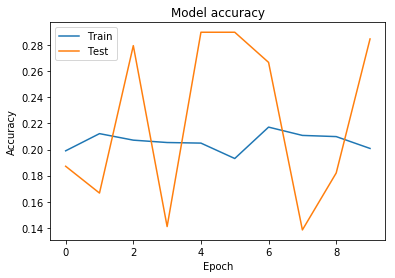

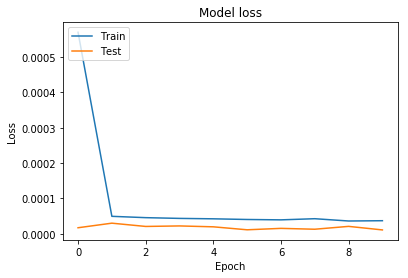

In [3]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 验证集误差计算

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\AppData\\Local\\conda\\conda\\envs\\finance35\\lib\\site-packages\\matplotlib\\pyplot.py'>

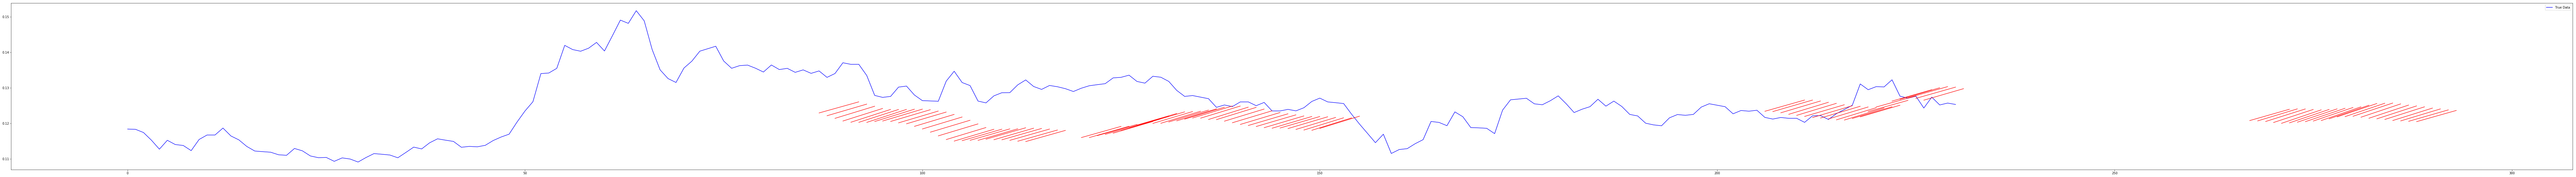

In [5]:
X_val,Y_val=dataloader.get_valid_data(window,days,True)
# model.evaluate(X_val,Y_val)
pred=model.predict(X_val)
# unit.plot_by_xl(X_val,Y_val,window,days,figsize=(150,10))
unit.plot_by_xl(X_val,pred,window,days,figsize=(150,10))

In [ ]:
# dataloader.get_valid_data(window,days,False)

In [ ]:
# dataloader.data.iloc[-days:]

In [ ]:
# dataloader.data.iloc[-window-days:]

In [ ]:
# def plot_results_multiple(predicted_data, true_data, prediction_len):
#     fig = plt.figure(facecolor='white',figsize=(18, 5))
#     ax = fig.add_subplot(111)
#     ax.plot(true_data, label='True Data')
# 	# Pad the list of predictions to shift it in the graph to it's correct start
#     for i, data in enumerate(predicted_data):
#         padding = [None for p in range(i)]
#         plt.plot(padding + list(data))
#         plt.legend()
#     plt.show()

In [ ]:
# -(window+days)*2

In [ ]:
import datetime
start_online=(dataloader.data.index[-1]+datetime.timedelta(days=-(window+days)*2)).strftime('%Y-%m-%d')
print(start_online)
online_data=DataLoader('601398', '399300',split=0,online=True,start=start_online)
online_data.data.shape

In [ ]:
X_online,Y_online=online_data.get_train_data(window,days,norm)
print(X_online.shape),print(Y_online.shape)
Y_pred_online=model.predict(X_online,{ 'verbose': 2})

In [ ]:
unit.plot_by_xl(X_online,Y_online,window,days)
unit.plot_by_xl(X_online,Y_pred_online,window,days)

In [ ]:
plot_results_multiple(Y_pred_online,Y_online[:,0],days)

In [ ]:
Y_pred_online

In [ ]:
Y_online[:,0]

In [ ]:
X_online[:,0][:,0]

In [ ]:
X_online[:,0,0]

In [ ]:
X_online